In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os 
import sys
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
sys.path.insert(0, parent_path)


from scripts.read import read

In [7]:
raw_df = read('Files/raw.csv')
raw_df.head(
    )

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [9]:
raw_df.shape

(1407328, 6)

In [10]:
raw_df['headline_char_count'] = raw_df['headline'].str.len()
raw_df['headline_word_count'] = raw_df['headline'].str.split().str.len()

raw_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_char_count,headline_word_count
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,7
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,7
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,5
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,7
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,14


In [11]:
raw_df[['headline_char_count', 'headline_word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
headline_char_count,1407328.0,73.120515,40.735310,3.0,47.0,64.0,87.0,512.0
headline_word_count,1407328.0,11.416706,6.352997,1.0,7.0,10.0,13.0,77.0


In [12]:

# Count the number of articles per publisher
articles_per_publisher = raw_df['publisher'].value_counts()

# Display top 20 articles per publisher  
articles_per_publisher[:20] 

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

In [13]:
# Check the first few rows of the 'date' column
print(raw_df['date'].head(10))

# Check for rows that became NaT in 'date_time'
invalid_rows = raw_df[raw_df['date'].isna()]
print(invalid_rows['date'].head(10))


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object
Series([], Name: date, dtype: object)


In [14]:
raw_df['date'] = pd.to_datetime(raw_df['date'], format='ISO8601')

In [15]:
raw_df.head(100)

,Unnamed: 0,headline,url,publisher,date,stock,headline_char_count,headline_word_count
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,7
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,7
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,5
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,7
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,14
...,...,...,...,...,...,...,...,...
95,95,Barclays Maintains Equal-Weight on Agilent Tec...,https://www.benzinga.com/news/19/10/14566662/b...,Vick Meyer,2019-10-09 00:00:00-04:00,A,83,11
96,96,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/10/14...,Benzinga Newsdesk,2019-10-08 00:00:00-04:00,A,251,45
97,97,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/10/14...,Benzinga Newsdesk,2019-10-02 00:00:00-04:00,A,243,40
98,98,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/09/14...,Benzinga Newsdesk,2019-09-05 00:00:00-04:00,A,304,52


In [16]:
raw_df['date_only'] = raw_df['date'].dt.date

# Extract the day of the week
raw_df['day_of_week'] = raw_df['date'].dt.day_name()

# Count the number of articles per day
articles_per_day = raw_df['date_only'].value_counts().sort_index()

# Count the number of articles per day of the week
articles_per_day_of_week = raw_df['day_of_week'].value_counts().sort_index()

In [17]:
# Display the number of articles per day
articles_per_day

date_only
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64

In [18]:
# Display the number of articles per day of the week
articles_per_day_of_week

day_of_week
Friday       217892
Monday       265164
Saturday       7753
Sunday        16514
Thursday     302595
Tuesday      296470
Wednesday    300940
Name: count, dtype: int64

## Text Analysis(Sentiment analysis & Topic Modeling)

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis on headlines
raw_df['sentiment'] =raw_df['headline'].apply(get_sentiment)

# Display the first few rows to check the sentiment column
raw_df[['headline', 'sentiment']].head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Extract keywords/phrases using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Apply Latent Dirichlet Allocation (LDA) to extract topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display the topics
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

## Time Series

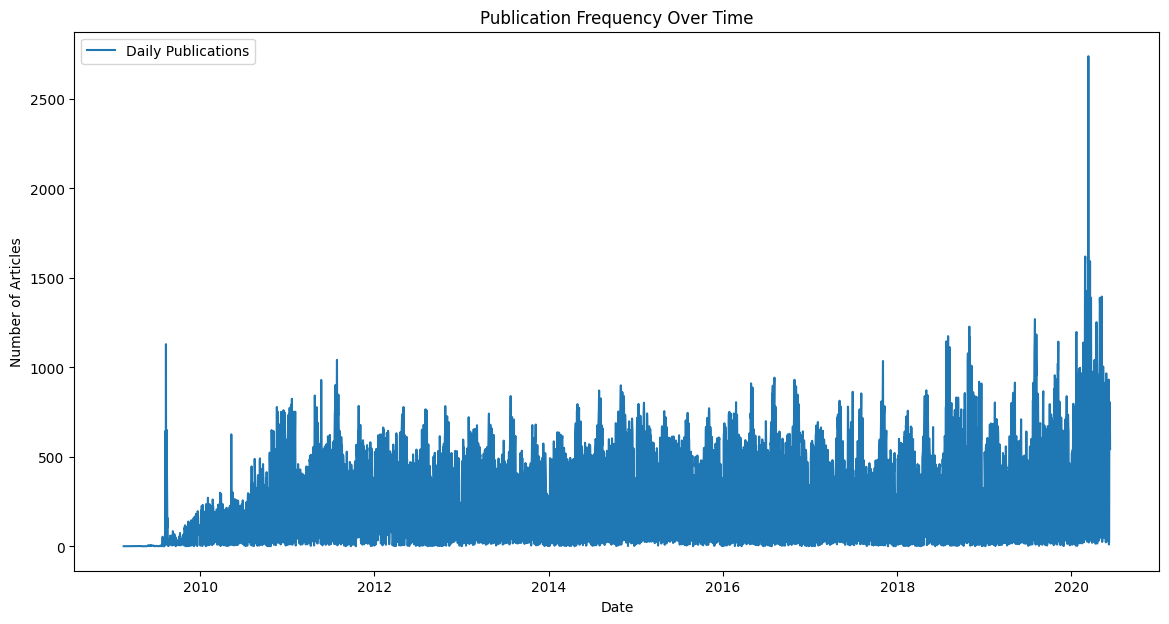

Dates with spikes in article publications:
date_only
2009-08-10    1130
2011-05-23     930
2011-07-28    1042
2016-08-04     943
2016-10-27     931
              ... 
2020-05-07    1396
2020-05-08     927
2020-05-13    1005
2020-05-26     967
2020-06-05     932
Length: 85, dtype: int64


In [22]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
raw_df['date'] = pd.to_datetime(raw_df['date'])

# Extract the date only (without time) and create a new column 'date_only'
raw_df['date_only'] = raw_df['date'].dt.date

# Group by 'date_only' and count the number of articles published each day
daily_publication_counts = raw_df.groupby('date_only').size()

# Plot the publication frequency over time
plt.figure(figsize=(14, 7))
plt.plot(daily_publication_counts.index, daily_publication_counts.values, label='Daily Publications')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Time')
plt.legend()
plt.show()

# Identify spikes in article publications
# Define a threshold for identifying spikes (e.g., mean + 2*std)
threshold = daily_publication_counts.mean() + 2 * daily_publication_counts.std()

# Find dates where the publication count exceeds the threshold
spike_dates = daily_publication_counts[daily_publication_counts > threshold]

# Print the dates with spikes and their corresponding publication counts
print("Dates with spikes in article publications:")
print(spike_dates)

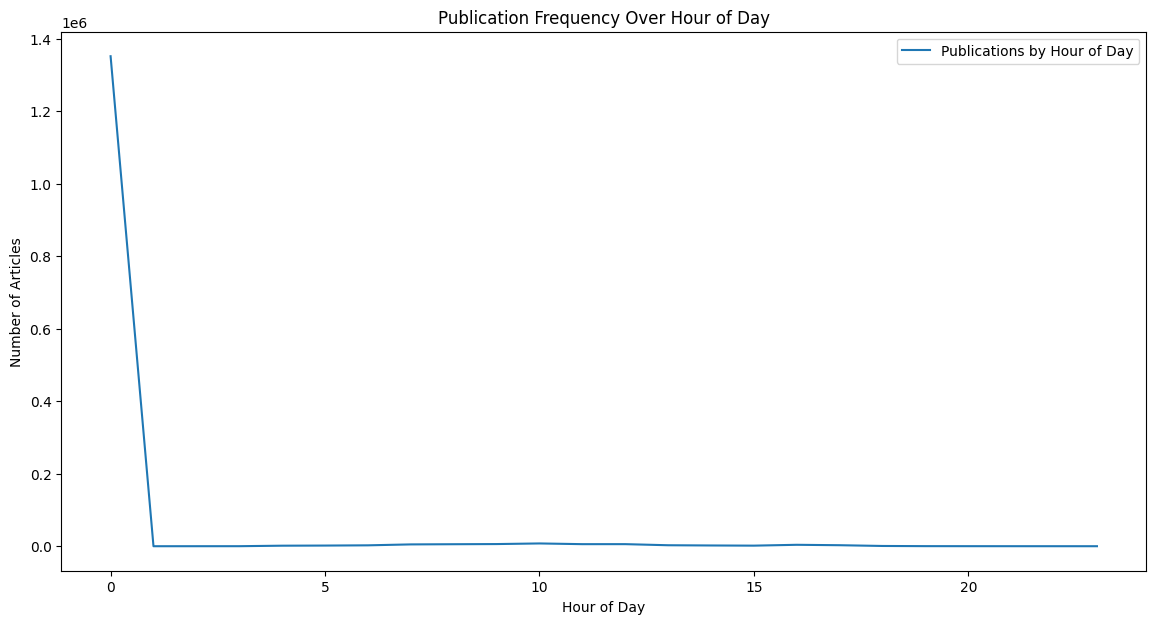

Hours with the highest publication counts:
time_only
0    1351408
dtype: int64


In [25]:
# Analyze the publishing times to find the most common times for news releases

# Extract the time from the 'date' column and create a new column 'time_only'
raw_df['time_only'] = raw_df['date'].dt.hour

# Group by 'time_only' and count the number of articles published at each hour
time_publication_counts = raw_df.groupby('time_only').size()

# Plot the publication frequency over time of day
plt.figure(figsize=(14, 7))
plt.plot(time_publication_counts.index, time_publication_counts.values, label='Publications by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Hour of Day')
plt.legend()
plt.show()

# Identify the most common publishing times
# Define a threshold for identifying common times (e.g., mean + 2*std)
time_threshold = time_publication_counts.mean() + 2 * time_publication_counts.std()

# Find hours where the publication count exceeds the threshold
common_times = time_publication_counts[time_publication_counts > time_threshold]

# Print the hours with the highest publication counts and their corresponding counts
print("Hours with the highest publication counts:")
print(common_times)

## Publisher Analysis

In [27]:
# Get the top 10 publishers by article count
top_publishers = raw_df['publisher'].value_counts().head(10)

# Print the top publishers and their article counts
print("Top 10 publishers by article count:")
print(top_publishers)

Top 10 publishers by article count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


Mean headline length for the top 10 publishers:
publisher
Paul Quintaro         84.347839
Lisa Levin            47.502998
Benzinga Newsdesk    114.650508
Charles Gross         80.999328
Monica Gerson         51.002950
Eddie Staley          78.382296
Hal Lindon            87.955064
ETF Professor         44.089438
Juan Lopez            75.108200
Benzinga Staff        62.709789
Name: headline_length, dtype: float64


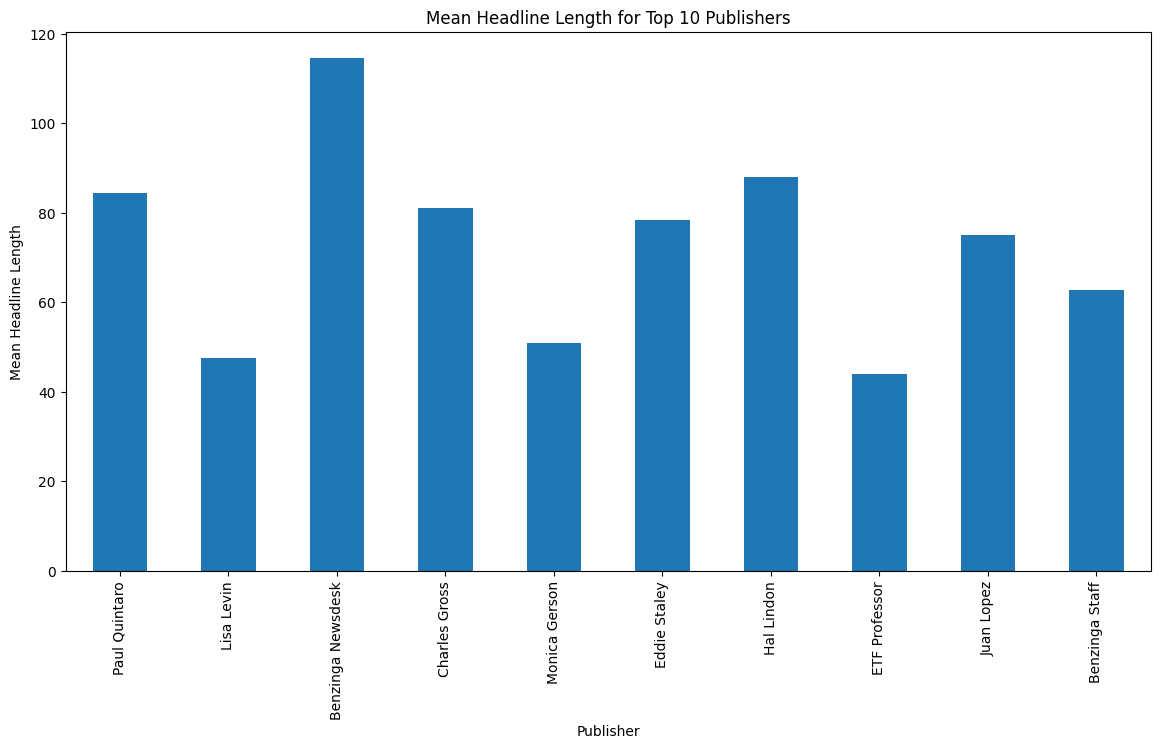

In [28]:
# Create a new column 'headline_length' to analyze the length of headlines
raw_df['headline_length'] = raw_df['headline'].apply(len)

# Group by 'publisher' and calculate the mean headline length for each publisher
publisher_headline_length = raw_df.groupby('publisher')['headline_length'].mean()

# Filter the results to include only the top 10 publishers
top_publishers_headline_length = publisher_headline_length[top_publishers.index]

# Print the mean headline length for the top 10 publishers
print("Mean headline length for the top 10 publishers:")
print(top_publishers_headline_length)

# Plot the mean headline length for the top 10 publishers
plt.figure(figsize=(14, 7))
top_publishers_headline_length.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Mean Headline Length')
plt.title('Mean Headline Length for Top 10 Publishers')
plt.show()

### If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Suraphel\AppData\Local\Temp\ipykernel_10808\1242221405.py:4: SyntaxWarning: invalid escape sequence '\w'
  raw_df['publisher_domain'] = raw_df['publisher'].apply(lambda x: re.search("@[\w.]+", x).group() if re.search("@[\w.]+", x) else x)
C:\Users\Suraphel\AppData\Local\Temp\ipykernel_10808\1242221405.py:4: SyntaxWarning: invalid escape sequence '\w'
  raw_df['publisher_domain'] = raw_df['publisher'].apply(lambda x: re.search("@[\w.]+", x).group() if re.search("@[\w.]+", x) else x)


Unique domains and their counts:
publisher_domain
Paul Quintaro         228373
Lisa Levin            186979
Benzinga Newsdesk     150484
Charles Gross          96732
Monica Gerson          82380
                       ...  
Paul Dykewicz              1
Anthony Cibotti            1
DavidBDurandMD             1
Lydia Idem Finkley         1
David A. Moore             1
Name: count, Length: 1024, dtype: int64


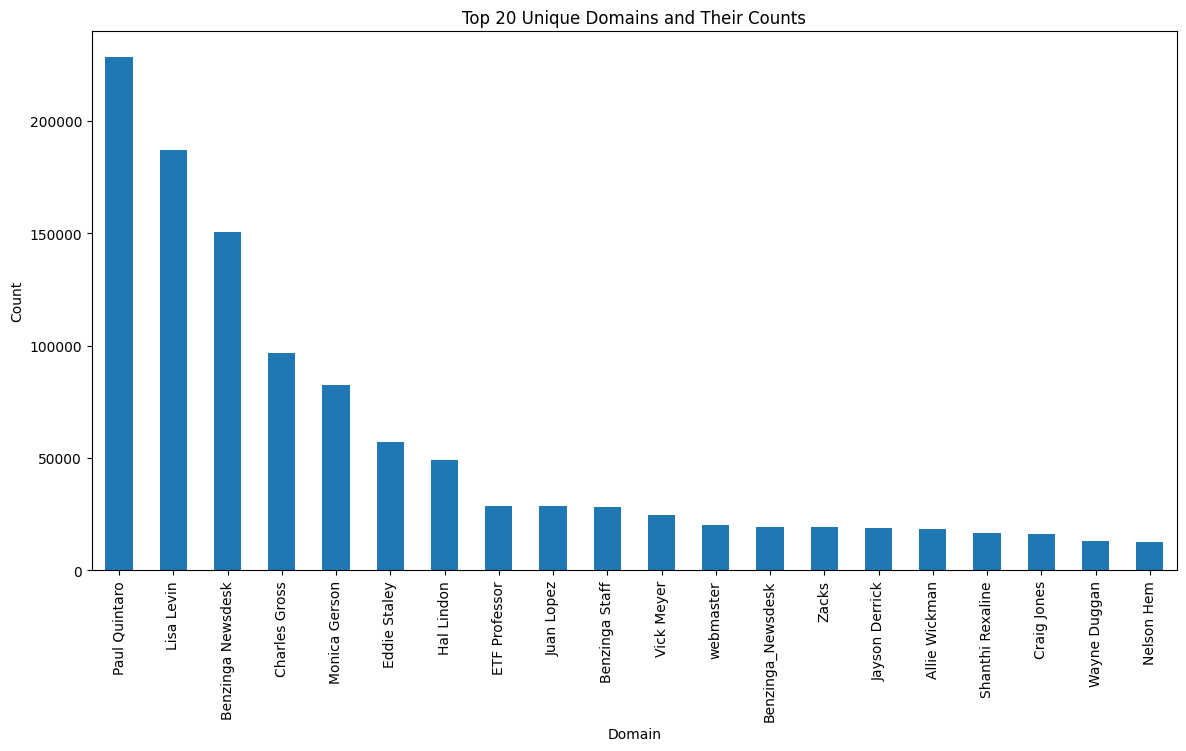

In [29]:
import re

# Extract domain from email addresses in the 'publisher' column
raw_df['publisher_domain'] = raw_df['publisher'].apply(lambda x: re.search("@[\w.]+", x).group() if re.search("@[\w.]+", x) else x)

# Get the unique domains and their counts
domain_counts = raw_df['publisher_domain'].value_counts()

# Print the unique domains and their counts
print("Unique domains and their counts:")
print(domain_counts)

# Plot the top 20 unique domains and their counts for better clarity
top_domain_counts = domain_counts.head(20)

plt.figure(figsize=(14, 7))
top_domain_counts.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.title('Top 20 Unique Domains and Their Counts')
plt.show()